# Modeling 

In [9]:
import pandas as pd
import seaborn as sns

In [5]:
df = pd.read_csv('./data/final_alex_eda_dataframe.csv')

In [6]:
import statsmodels.api as sm

**We are interested to see if states that are mask positive have a significant impact on percent change in cases. R2 of .05 is low and the p-val of .13 is insignificant.**

In [8]:
sns.regplot(data = df, x='mask_positive', y='percent change cases', color='green')
plt.xlabel('Mask Positive')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Positive Relates to Change in Cases')
plt.savefig('pos_mask_cases.png');

NameError: name 'sns' is not defined

In [7]:
X = df['mask_positive']
y = df['percent change cases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     percent change cases   R-squared:                       0.046
Model:                              OLS   Adj. R-squared:                  0.027
Method:                   Least Squares   F-statistic:                     2.372
Date:                  Thu, 29 Oct 2020   Prob (F-statistic):              0.130
Time:                          20:07:30   Log-Likelihood:                -108.02
No. Observations:                    51   AIC:                             220.0
Df Residuals:                        49   BIC:                             223.9
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             4.7807      1.881      2.541      0.014       1.000       8.562
mask_positive    -3.8184      2.480     -1.540      0.130      -8.801       1.164
==============================================================================
Omnibus:                       49.160   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.309
Skew:                           2.611   Prob(JB):                     9.63e-46
Kurtosis:                      11.384   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

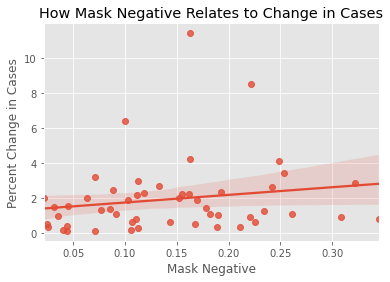

In [199]:
sns.regplot(data = df, x='mask_negative', y='percent change cases')
plt.xlabel('Mask Negative')
plt.ylabel('Percent Change in Cases')
plt.title('How Mask Negative Relates to Change in Cases');
plt.savefig('neg_mask_cases.png')

<AxesSubplot:xlabel='percent change cases', ylabel='pop'>

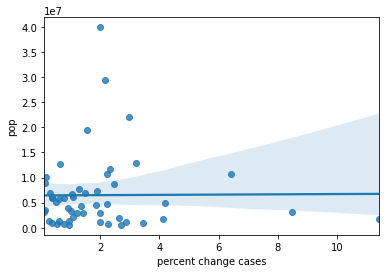

In [35]:
sns.regplot(data = df, x='percent change cases', y='pop')

In [36]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [116]:
X = df[['never_count', 'rarely_count', 'sometimes_count', 'frequently_count', 'always_count', 'votesdem', 'votesrep', 'electoraldem', 'electoralrep', 'pop', 'deaths', 'cases']]

y = df['percent change cases']

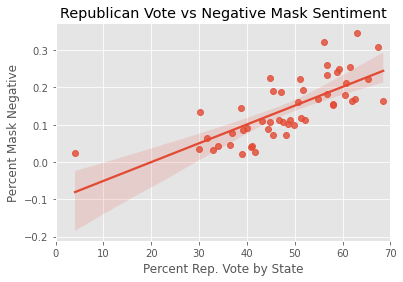

In [180]:
sns.regplot(data=df, x='percr', y='mask_negative', label='Significance=.004')
plt.ylabel('Percent Mask Negative')
plt.xlabel('Percent Rep. Vote by State')
plt.xlim(0, 70)
plt.title('Republican Vote vs Negative Mask Sentiment')
#plt.legend();
plt.savefig('republican_mask')

In [145]:
X = df['percr']
y = df['mask_negative']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          mask_negative   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     56.26
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           1.12e-09
Time:                        18:15:12   Log-Likelihood:                 75.003
No. Observations:                  51   AIC:                            -146.0
Df Residuals:                      49   BIC:                            -142.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1011      0.033     -3.022      0.004      -0.168      -0.034
percr          0.0050      0.001      7.501      0.000       0.004       0.006
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   2.261
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.440
Skew:                           0.699   Prob(JB):                        0.109
Kurtosis:                       2.634   Cond. No.                         210.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [203]:
df.head()

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
0,AK,0.053429,0.064643,0.092821,0.326393,0.462571,0.118071,0.788964,116454,36.55,...,51.28,0,3,734002,0,1,24,4935,1.263374,2.275397
1,AL,0.081567,0.081090,0.146612,0.215343,0.475313,0.162657,0.690657,729547,34.36,...,62.08,0,9,4908620,0,1,1228,88654,2.000000,4.203578
2,AR,0.090920,0.087253,0.138360,0.220627,0.462867,0.178173,0.683493,380494,33.65,...,60.57,0,6,3039000,0,1,537,40300,1.924681,1.404875
3,AZ,0.049667,0.053200,0.094667,0.147333,0.655000,0.102867,0.802333,1161167,45.13,...,48.67,0,11,7378490,0,1,3322,118223,1.938628,1.901212
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


In [207]:
X = df['mask_positive']
y = df['cases']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  cases   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.3713
Date:                Thu, 29 Oct 2020   Prob (F-statistic):              0.545
Time:                        17:05:39   Log-Likelihood:                -663.27
No. Observations:                  51   AIC:                             1331.
Df Residuals:                      49   BIC:                             1334.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5235.1016   1.01e+05      0.052      0.959   -1.97e+05    2.07e+05
mask_positive  8.083e+04   1.33e+05      0.609      0.545   -1.86e+05    3.47e+05
==============================================================================
Omnibus:                       54.426   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.762
Skew:                           3.021   Prob(JB):                     2.86e-51
Kurtosis:                      11.546   Cond. No.                         13.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [174]:
df.sort_values(by='mask_positive', ascending=False)

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases
39,RI,0.012200,0.009600,0.040000,0.136000,0.802000,0.021800,0.938000,252525,54.41,...,38.90,4,0,1056160,1,0,94,5149,1.213270,1.989023
11,HI,0.016200,0.018800,0.033400,0.116600,0.815000,0.035000,0.931600,266891,62.22,...,30.03,3,0,1412690,1,0,55,7719,1.333333,0.948387
19,MA,0.019500,0.011786,0.040143,0.131143,0.797286,0.031286,0.928429,1995196,60.01,...,32.81,11,0,6976600,1,0,983,19745,0.539222,1.481223
8,DE,0.019333,0.006667,0.060667,0.095667,0.817667,0.026000,0.913333,235603,53.09,...,41.72,3,0,982895,1,0,96,6025,0.097649,0.355427
7,DC,0.012000,0.013000,0.069000,0.164000,0.743000,0.025000,0.907000,282830,90.48,...,4.07,3,0,720687,1,0,54,3684,0.188605,0.523458
31,NJ,0.022905,0.021238,0.049429,0.157905,0.748429,0.044143,0.906333,2148278,54.99,...,41.00,14,0,8936570,1,0,872,20288,0.057833,0.116744
6,CT,0.017500,0.023000,0.053625,0.126375,0.779500,0.040500,0.905875,897572,54.57,...,40.93,7,0,3563080,1,0,142,6434,0.032840,0.138152
34,NY,0.022839,0.022452,0.049387,0.135274,0.769935,0.045290,0.905210,4556124,59.01,...,36.52,29,0,19440500,1,0,760,41467,0.993521,1.543830
20,MD,0.022917,0.020917,0.051542,0.161833,0.742750,0.043833,0.904583,1677928,60.33,...,33.91,10,0,6083120,1,0,556,40851,0.257143,0.380692
4,CA,0.032310,0.030724,0.063690,0.158603,0.714638,0.063034,0.873241,8753788,61.73,...,31.62,55,0,39937500,1,0,6981,476864,1.131809,1.988889


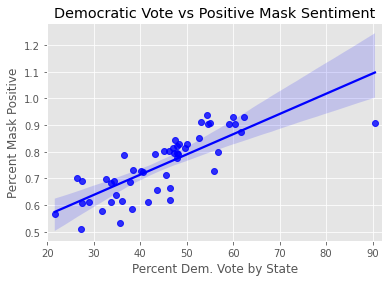

In [190]:
sns.regplot(data=df, x='percd', y='mask_positive', color='blue', label='')
plt.ylabel('Percent Mask Positive')
plt.xlabel('Percent Dem. Vote by State')
plt.xlim(20, 92)
plt.title('Democratic Vote vs Positive Mask Sentiment')
#plt.legend();
plt.savefig('democrat_mask.png')

In [183]:
X = df['percd']
y = df['mask_positive']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          mask_positive   R-squared:                       0.619
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     79.76
Date:                Wed, 28 Oct 2020   Prob (F-statistic):           7.47e-12
Time:                        18:35:24   Log-Likelihood:                 62.171
No. Observations:                  51   AIC:                            -120.3
Df Residuals:                      49   BIC:                            -116.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4110      0.039     10.461      0.0

In [40]:
df[(df['mask_negative'] < .05) & (df['percr'] < 10)]

,state,never,rarely,sometimes,frequently,always,mask_negative,mask_positive,votesdem,percd,...,percr,electoraldem,electoralrep,pop,blue,red,deaths,cases,percent change deaths,percent change cases


<AxesSubplot:xlabel='mask_positive', ylabel='percd'>

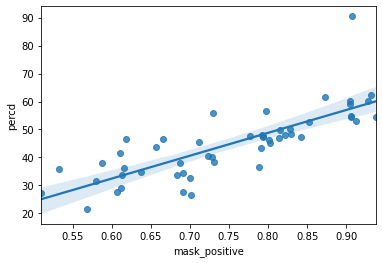

In [39]:
sns.regplot(data=df, x='mask_positive', y='percd')

In [105]:
from sklearn.linear_model import LinearRegression

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge

In [106]:
lr = LinearRegression()
ridge = Ridge()
ss = StandardScaler()

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .15)

In [108]:
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)